v = 10 m/s:
Controllability condition number (log10(sigma_max/sigma_min)) = 3.1247
Real part of pole 1 = 0.0000
Real part of pole 2 = -4.3063
Real part of pole 3 = -0.6002
Real part of pole 4 = 0.0000


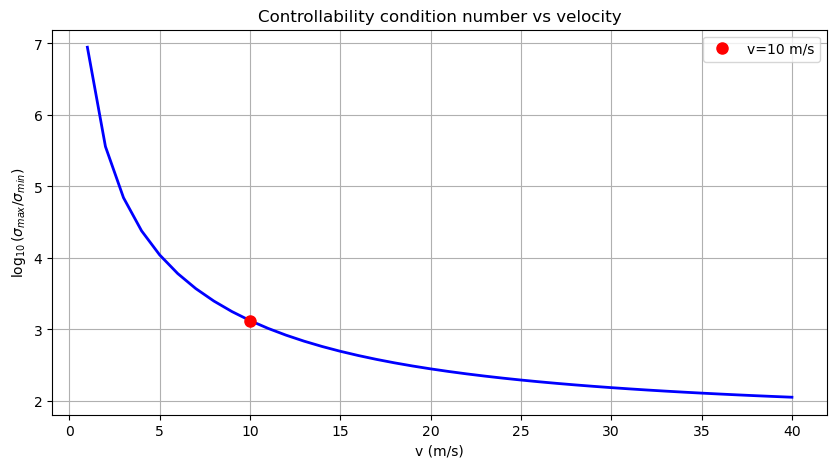

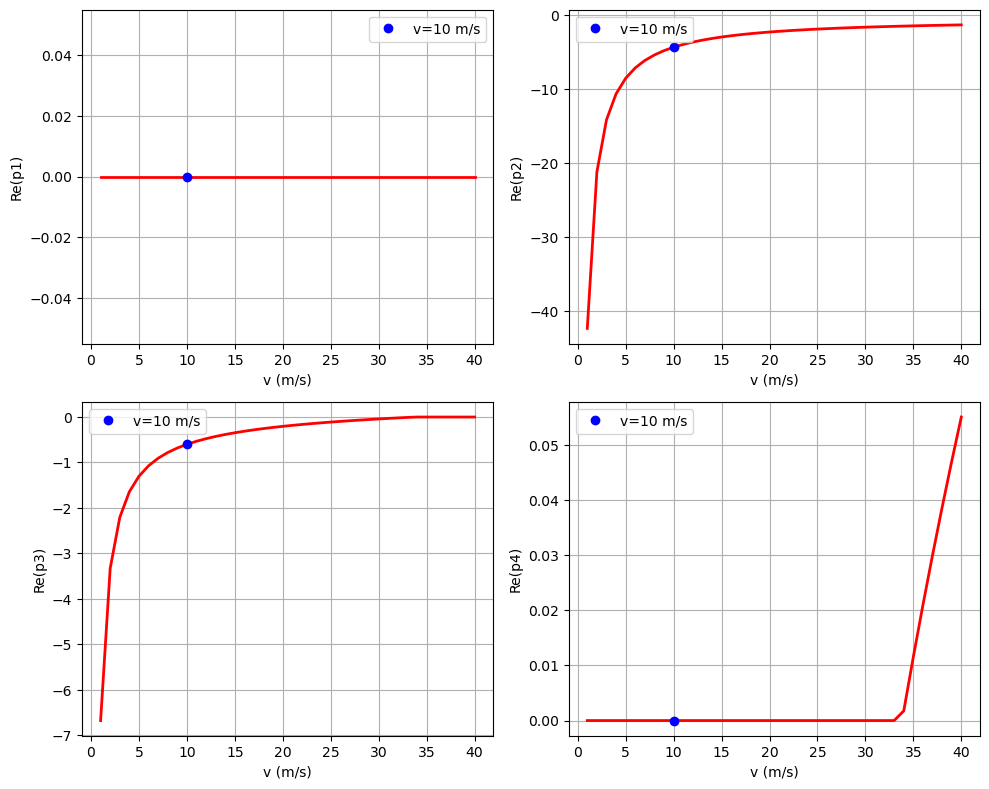

In [2]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import svd, eigvals

sp.init_printing(use_latex=True)
C_alpha, m, I_z, l_f, l_r, x_dot = sp.symbols('C_alpha m I_z l_f l_r x_dot', real=True)

A_lat = sp.Matrix([
    [0, 1, 0, 0],
    [0, -4*C_alpha/(m*x_dot), 4*C_alpha/m, -2*C_alpha*(l_f - l_r)/(m*x_dot)],
    [0, 0, 0, 1],
    [0, -2*C_alpha*(l_f - l_r)/(I_z*x_dot), 2*C_alpha*(l_f - l_r)/I_z, -2*C_alpha*(l_f**2 + l_r**2)/(I_z*x_dot)]
])

B_lat = sp.Matrix([
    [0, 0],
    [2*C_alpha/m, 0],
    [0, 0],
    [2*C_alpha*l_f/I_z, 0]
])

P_lat = B_lat.row_join(A_lat*B_lat).row_join(A_lat**2*B_lat).row_join(A_lat**3*B_lat)

params = {
    C_alpha: 20000,
    m: 1888.6,
    I_z: 25854,
    l_f: 1.55,
    l_r: 1.39
}

v_values = np.linspace(1, 40, 40)
log_sigma_ratio = []
poles_real = []

for v in v_values:
    A_num = A_lat.subs(params).subs(x_dot, v)
    P_num = P_lat.subs(params).subs(x_dot, v)
    
    A_np = np.array(A_num).astype(np.float64)
    P_np = np.array(P_num).astype(np.float64)
    
    sigma = svd(P_np, compute_uv=False)
    log_sigma_ratio.append(np.log10(np.max(sigma)/np.min(sigma)))
    
    eigs = eigvals(A_np)
    poles_real.append(np.real(eigs))

log_sigma_ratio = np.array(log_sigma_ratio)
poles_real = np.array(poles_real)

# Find the index closest to v=20
v_desired = 10
idx_v = np.argmin(np.abs(v_values - v_desired))

# Print values at v=20
print(f"v = {v_desired} m/s:")
print(f"Controllability condition number (log10(sigma_max/sigma_min)) = {log_sigma_ratio[idx_v]:.4f}")
for i in range(4):
    print(f"Real part of pole {i+1} = {poles_real[idx_v, i]:.4f}")

# Plot controllability condition number
plt.figure(figsize=(10,5))
plt.plot(v_values, log_sigma_ratio, 'b', linewidth=2)
plt.plot(v_values[idx_v], log_sigma_ratio[idx_v], 'ro', markersize=8, label=f'v={v_desired} m/s')
plt.xlabel('v (m/s)')
plt.ylabel(r'$\log_{10}(\sigma_{max}/\sigma_{min})$')
plt.title('Controllability condition number vs velocity')
plt.grid(True)
plt.legend()
plt.show()

# Plot poles real part
plt.figure(figsize=(10,8))
for i in range(4):
    plt.subplot(2, 2, i+1)
    plt.plot(v_values, poles_real[:, i], 'r', linewidth=2)
    plt.plot(v_values[idx_v], poles_real[idx_v, i], 'bo', markersize=6, label=f'v={v_desired} m/s')
    plt.xlabel('v (m/s)')
    plt.ylabel(f'Re(p{i+1})')
    plt.grid(True)
    plt.legend()
plt.tight_layout()
plt.show()


### Conclusions on Controllability and Stability

Controllability:

- The plot of $\log_{10}(\sigma_{\max} / \sigma_{\min})$ (from your previous message) decreases with velocity, indicating that the controllability condition improves as speed increases. The system is less controllable at low speeds and becomes more controllable at higher speeds.

Stability:

- Three poles have negative real parts at low speeds, indicating stability.

- One pole remains at zero real part for most speeds but starts becoming positive after about 33 m/s, indicating the system transitions from stable/marginally stable to unstable at high velocities.

- Two poles approach zero from negative values, suggesting marginal stability zones at higher speeds.
